In [1]:
from glycan import glycan
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
def read_MDCK_data():
    # Create an instance of the glycan class
    g2 = glycan()

    # Read data (CSV files) as pandas data frames. Each file is a new line.
    # Note that each file can have multiple experiments, called "tabs" here.
    # You can specify how many tabs you want to read using the totalTabs variable.
    numberedExcel2, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet2.csv', totalTabs=1, startExp=1)
    numberedExcel3, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet3.csv', totalTabs=1, startExp=(b+1))
    numberedExcel4, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet4.csv', totalTabs=2, startExp=(b+1))

    # Now combine all the data frames
    numberedExcel_temp = pd.concat([numberedExcel2, numberedExcel3, numberedExcel4], axis=0)
    mdck = numberedExcel_temp

    mdck.reset_index(drop=True, inplace=True)
    # Scaling the mean viral fluorescence by glycan density.
    mdck['MVF'] = mdck.MVF/mdck.GlycDen
    return mdck

In [3]:
mdck = read_MDCK_data()

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A va

In [4]:
# Function to get accuracy, precision, recall, and f-1 score for a given number of iterations
def getAcc(MI):
    g2 = glycan()
    X_train_mdck, Y_train_mdck, X_test_mdck, Y_test_mdck, bindData_mdck = g2.getTrainTest(mdck, cutoff = 0.03, dropDP=True, test_size=0.33)
    #clf_mdck = svm.SVC(max_iter=MI, verbose=True)
    clf_mdck = svm.SVC(max_iter=MI, verbose=False)
    clf_mdck.fit(X_train_mdck, Y_train_mdck)
    preds_train_mdck = clf_mdck.predict(X_train_mdck)
    preds_test_mdck = clf_mdck.predict(X_test_mdck)
    acc = accuracy_score(Y_test_mdck,preds_test_mdck)
    prec = precision_score(Y_test_mdck, preds_test_mdck)
    rec = recall_score(Y_test_mdck, preds_test_mdck)
    f1 = f1_score(Y_test_mdck, preds_test_mdck)
    return acc, prec, rec, f1

In [5]:
# Vary number of iterations from 20 through 223, in steps of 20

accList = np.zeros(11)
precList = np.zeros(11)
recList = np.zeros(11)
f1List = np.zeros(11)

count = 0
for MI in range(20,223,20):
    a, b, c, d = getAcc(MI)
    accList[count] = a
    precList[count] = b
    recList[count] = c
    f1List[count] = d
    count += 1

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A

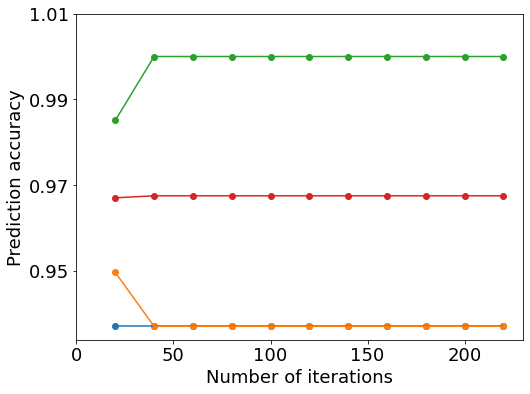

In [8]:
# Plot the 4 performance metrices wrt number of iterations
plt.figure(figsize=(8,6))
xVals = np.arange(20,223,20)
plt.scatter(xVals, accList, label='Accuracy')
plt.scatter(xVals, precList, label='Precision')
plt.scatter(xVals, recList, label='Recall')
plt.scatter(xVals, f1List, label='F1 score')
plt.plot(xVals, accList)
plt.plot(xVals, precList)
plt.plot(xVals, recList)
plt.plot(xVals, f1List)

plt.xticks(np.arange(0, 201, 50), fontsize=18)
plt.yticks(np.arange(0.95, 1.01, 0.02), fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.ylabel("Prediction accuracy", fontsize=18)

plt.savefig("Plots/MDCK_convergence.pdf")

In [9]:
# Save the data file if needed
acc = np.column_stack((xVals, accList, precList, recList, f1List))
np.savetxt("Results/mdck_all.txt", acc)